### Introduction ###
To determine the best neighborhood in Pittsburgh, we established three metrics of measurement: environmental friendliness, public safety, and financial level. <br>
Each group member analyzed one metric with independent datasets and found the top neighborhoods in their dataset. <br>
The final best neighborhoods is obtained by selecting the overlapping top neighborhoods in each metric. <br>
We concluded that these neighborhoods are the best for middle-age families who wish to find a stable settlement for work and children. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

db = pd.read_csv("Natural_Environment_Conditions_2010.csv", sep=",")

avg_num_trees = db["# Street Trees"].mean()
avg_num_parkSpace = db["Park Space (acres/1000 pers.)"].mean()


mask = (db["# Street Trees"] > avg_num_trees  ) & (db["Park Space (acres/1000 pers.)"] > avg_num_parkSpace - 20 )
maskedDB = db[mask] 

top30_env = maskedDB[["Neighborhood", "# Street Trees", "Park Space (acres/1000 pers.)" ]].sort_values("# Street Trees", ascending = False)
top30_env

,Neighborhood,# Street Trees,Park Space (acres/1000 pers.)
76,Squirrel Hill South,2263,45.306618
75,Squirrel Hill North,1846,2.309601
67,Shadyside,1601,1.225656
71,South Side Flats,1337,3.178111
62,Point Breeze,1092,10.307432
9,Bloomfield,1035,0.562544
39,Highland Park,1012,54.844722
13,Brookline,813,4.604359
78,Stanton Heights,730,3.027385
12,Brighton Heights,729,4.587415


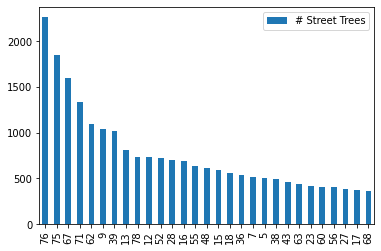

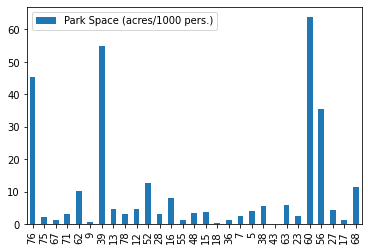

In [2]:
trees = top30_env[["Neighborhood", "# Street Trees"]]
park = top30_env[["Neighborhood", "Park Space (acres/1000 pers.)"]]
trees.plot.bar()
park.plot.bar()

In [3]:
pub = pd.read_csv("Public_safety.csv", sep=",")


pub["Combined Crime Score"] = pub["Part 1 Crime per 100 Persons (2010)"]*2 + pub["Part 2 Crime per 100 Persons (2010)"]

top30_pub = pub[["Neighborhood" , "Part 1 Crime per 100 Persons (2010)","Part 2 Crime per 100 Persons (2010)", "Combined Crime Score" ]].sort_values("Combined Crime Score", ascending = True).head(30)
top30_pub

,Neighborhood,Part 1 Crime per 100 Persons (2010),Part 2 Crime per 100 Persons (2010),Combined Crime Score
31,Fairywood,0.299401,0.598802,1.197605
54,New Homestead,0.707071,0.404040,1.818182
75,Squirrel Hill North,1.302473,0.968054,3.573000
45,Lincoln Place,0.991633,1.952278,3.935544
58,Oakwood,1.363194,1.363194,4.089581
80,Summer Hill,1.236917,2.093245,4.567079
55,North Oakland,1.724955,1.288977,4.738887
78,Stanton Heights,1.456205,1.912628,4.825038
5,Banksville,1.496139,1.954633,4.946911
26,East Carnegie,1.578947,1.929825,5.087719


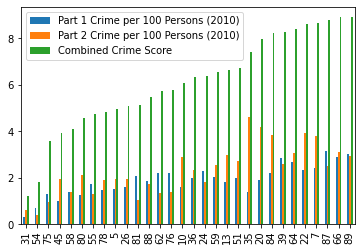

In [4]:
top30_pub.plot.bar()

In [5]:
# Education-Income
chip = pd.read_csv("education-income.csv")
#chip.head(10)

In [6]:
# Rename columns by removing problematic characters such as "'","%","$",","
chip.columns = chip.columns.str.replace("'"," ")
chip['Edu. Attainment: Bachelor s Degree (2010)'] = chip['Edu. Attainment: Bachelor s Degree (2010)'].str.replace('%', '')
chip["Edu. Attainment: Postgraduate Degree (2010)"] = chip['Edu. Attainment: Postgraduate Degree (2010)'].str.replace('%', '')
chip['2009 Med. Income ( 13 Dollars)'] = chip['2009 Med. Income ( 13 Dollars)'].str.replace('$','')
chip['2009 Med. Income ( 13 Dollars)'] = chip['2009 Med. Income ( 13 Dollars)'].str.replace(',','')
chip['Est. Percent Under Poverty (2010)'] = chip['Est. Percent Under Poverty (2010)'].str.replace('%','')
chip = chip[['Neighborhood','Edu. Attainment: Bachelor s Degree (2010)','Edu. Attainment: Postgraduate Degree (2010)','2009 Med. Income ( 13 Dollars)','Est. Percent Under Poverty (2010)']]
#chip.head(10)

<ipython-input-6-f47e7fa97ea9>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  chip['2009 Med. Income ( 13 Dollars)'] = chip['2009 Med. Income ( 13 Dollars)'].str.replace('$','')


In [7]:
# Combine data in Bachelor's and Post Graduate Degree columns for a total of 30 rows
# purpose is to sort by highest percentage of highest degrees of education
sum_edu= chip['Edu. Attainment: Postgraduate Degree (2010)'].astype(float) + chip['Edu. Attainment: Bachelor s Degree (2010)'].astype(float)
sorted_sum = sum_edu.sort_values(ascending = False)
sort = pd.DataFrame(sorted_sum)
count = 0
d = list()
for index,row in sort.iterrows():
    if count < 30:
        d.append(chip.iloc[index])
        count+=1
    else: break
sorted_edu = pd.DataFrame(d)
#sorted_edu

In [8]:
# sorted by most income and least poverty separately, sort income from highest to lowest, sort poverty from lowest to highest
chip['2009 Med. Income ( 13 Dollars)'] = chip['2009 Med. Income ( 13 Dollars)'].astype(int)
sorted_income = chip.sort_values(by = '2009 Med. Income ( 13 Dollars)',ascending = False)
#sorted_income.head(10)
chip['Est. Percent Under Poverty (2010)'] = chip['Est. Percent Under Poverty (2010)'].astype(float)
sorted_poverty = chip.sort_values(by = 'Est. Percent Under Poverty (2010)')
#sorted_poverty.head(10)

In [9]:
# use data from top 30 for income and poverty
top30_income = sorted_income.head(30)
bot30_poverty = sorted_poverty.head(30)
# only extracted out the Neighborhood column so that when marged with sorted_edu will avoid replicating columns
bot30_poverty = bot30_poverty[['Neighborhood']]
top30_income = top30_income[['Neighborhood']]
#bot30_poverty

In [10]:
# found common neighborhoods with most income, highest education, and least poverty using merge
top_eduIncome = sorted_edu.merge(bot30_poverty, on='Neighborhood').merge(top30_income, on="Neighborhood")
top_eduIncome

,Neighborhood,Edu. Attainment: Bachelor s Degree (2010),Edu. Attainment: Postgraduate Degree (2010),2009 Med. Income ( 13 Dollars),Est. Percent Under Poverty (2010)
0,Squirrel Hill North,26.70,40.10,91409,8.80
1,Regent Square,21.00,44.00,84635,1.10
2,Squirrel Hill South,27.40,32.00,59376,11.70
3,Point Breeze,25.90,32.50,95704,4.60
4,Highland Park,23.90,31.80,66985,9.20
5,Allegheny West,44.80,10.50,45519,5.00
6,Strip District,33.40,18.50,70706,2.10
7,South Shore,0.00,47.60,163773,0.00
8,Greenfield,22.30,17.30,47502,9.20
9,Swisshelm Park,26.20,11.80,79025,2.10


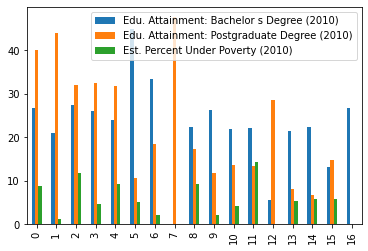

In [11]:
top_edu = top_eduIncome[['Edu. Attainment: Bachelor s Degree (2010)',	'Edu. Attainment: Postgraduate Degree (2010)','Est. Percent Under Poverty (2010)']]
top_edu.astype(float).plot.bar()

In [12]:
# top common neighborhoods in all three subcategories
top = top_eduIncome.merge(top30_pub, on = "Neighborhood").merge(top30_env, on = "Neighborhood")
top

,Neighborhood,Edu. Attainment: Bachelor s Degree (2010),Edu. Attainment: Postgraduate Degree (2010),2009 Med. Income ( 13 Dollars),Est. Percent Under Poverty (2010),Part 1 Crime per 100 Persons (2010),Part 2 Crime per 100 Persons (2010),Combined Crime Score,# Street Trees,Park Space (acres/1000 pers.)
0,Squirrel Hill North,26.70,40.10,91409,8.80,1.302473,0.968054,3.573000,1846,2.309601
1,Squirrel Hill South,27.40,32.00,59376,11.70,2.190602,1.389808,5.771013,2263,45.306618
2,Point Breeze,25.90,32.50,95704,4.60,2.182502,1.354657,5.719661,1092,10.307432
3,Highland Park,23.90,31.80,66985,9.20,2.845973,2.580141,8.272088,1012,54.844722
4,Greenfield,22.30,17.30,47502,9.20,1.987935,2.330683,6.306553,540,1.315191
5,Stanton Heights,21.90,13.50,53354,4.20,1.456205,1.912628,4.825038,730,3.027385
6,Banksville,22.30,6.60,55181,5.80,1.496139,1.954633,4.946911,506,4.115347


<ipython-input-13-5cd2e27da7e0>:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  comb = colList.sum(axis=1)
<ipython-input-13-5cd2e27da7e0>:20: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  ax.pie(x, labels=labels, autopct='%1.1f%%', radius=3, center=(4, 4),


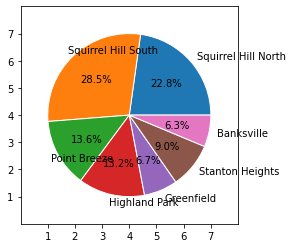

In [13]:
list_of_my_columns = top[['Edu. Attainment: Bachelor s Degree (2010)', 'Edu. Attainment: Postgraduate Degree (2010)', '2009 Med. Income ( 13 Dollars)','# Street Trees','Park Space (acres/1000 pers.)']]

# sum all values in columns to make proprtion for pie chart
colList = pd.DataFrame(list_of_my_columns)
comb = colList.sum(axis=1)
cb = pd.DataFrame(comb)
count = 0
x = list()
for index,row in cb.iterrows():
    if count < 7:
        x.append(row)
        count+=1
    else: break

# make data
colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, len(x)))
labels = 'Squirrel Hill North','Squirrel Hill South','Point Breeze','Highland Park','Greenfield','Stanton Heights','Banksville'
# plot
fig, ax = plt.subplots()
ax.pie(x, labels=labels, autopct='%1.1f%%', radius=3, center=(4, 4),
       wedgeprops={"linewidth": 1, "edgecolor": "white"}, frame=True)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()
# the chart below does not take into consideration of crime rates; hence Squirrel Hill South is a greater portion than North, whereas in the actual ranking, North ranks higher than South. 
# This tells us that while Squirrel Hill South has better education-income and environment, it also has higher crime rates.

### Conclusion ###
After sorting the highest ranked neighborhoods in each individual dataset, we found that Squirrel Hill North and South are the best neighborhood, with the highest combined and weighted value of education-income, number of trees, and least crime. Point Breeze a Highland Park rank third and fourth very closely. Geographically, these two neighborhoods are close to each other and similarly close to Squirrel Hill - within 15 minutes drive - which makes sense to be ranked among the highest neighborhoods. <br>
Something we have noticed is that all of these top six neighborhoods except for Banksville is located north of the Monogahela and Ohio River. So if one has strong preference to live more towards southern Pittsburgh, Banksville would be the preferred choice. <br>
Under our metrics of best environment, highest financial status, and lowest crime, we recommend families with children who wish to settle for long term to choose Squirrel Hill as the optimal location. 